In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/Cha cha
 [INFO] : 
 |  path ignored: name `Cha cha` in IGNORE_DIRS
path ignored: ../datasets/drum_midi/Cha cha 

path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
  05 8th Hat.mid
  03 8th Ride.mid
  04 8th Perc.mid
  06 8th Perc.mid
  02 8th Hat.mid
  07 8th Perc.mid
  01 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM
  06 8th hat.mid
  02 8th Ride.mid
  05 8th Ride.mid
  03 8th Ride.mid
  07 8th Toms.mid
  04 8th Perc.mid
  01 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  06 8th Toms.mid
  05 8th Snare.mid
  04 8th Ride.mid
  07 8th Toms.mid
  02 8th Snare.mid
  01 8th Hat.mid
  03 4th Snare .mid
path ../datasets/drum_

  04 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
  03 8th Hat.mid
  02 8th Perc.mid
  04 8th Ride.mid
  05 8th Toms.mid
  01 8th Perc.mid
  07 8th Hat.mid
  06 8th Multi.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/04 Country/07 Trainy 100BPM
  04 16th Toms.mid
  06 16th Perc.mid
  05 16th Perc.mid
  03 16th Toms.mid
  01 16th Snare.mid
  02 16th Snare.mid
  07 16th Perc.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/04 Country/03 Straight 72BPM Brushes
  01 8th Snare.mid
  03 8th Snare.mid
  05 8th Multi.mid
  07 8th Snare.mid
  02 8th Hat.mid
  04 8th Snare.mid
  06 8th Multi.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/04 Country/02 Marching 94BPM
  07 8th Multi.mid
  05 8th Snare.mid
  01 8th Snare.mid
  03 8th Perc.mid
  02 8th Snare.mid
  04 8th Toms.mid
  06 8th Multi.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/03 Traditional Pop
path ../datasets/drum_midi/50´s Drummer MIDI Files/03 Tradit

  10 8th Hat Both.mid
  06 8th Hat Both Side.mid
  11 8th Hat Both.mid
  05 8th Hat Open.mid
path ../datasets/drum_midi/70´s Drummer MIDI Files/Tight Kit/04 Progressive Rock
path ../datasets/drum_midi/70´s Drummer MIDI Files/Tight Kit/04 Progressive Rock/02 Bonny 105BPM
  07 4th Ride.mid
  09 4th Hat Closed.mid
  10 8th Ride.mid
  13 16th Snare Ride.mid
  05 8th Ride.mid
  04 8th Ride.mid
  06 4th Hat Open.mid
  01 8th Hat Closed.mid
  14 16th Snare Hat.mid
  08 4th Ride.mid
  03 8th Toms.mid
  11 8th Toms.mid
  12 8th Hat Closed.mid
  02 8th Hat Closed.mid
  15 16th Cym.mid
path ../datasets/drum_midi/70´s Drummer MIDI Files/Tight Kit/04 Progressive Rock/01 Troy 202BPM 5-4
  12 4th Ride.mid
  07 4th Ride.mid
  03 4th Hat Both.mid
  13 4th Ride.mid
  10 4th Ride Toms.mid
  06 4th Hat Open.mid
  01 4th Hat Both.mid
  09 2nd Ride.mid
  15 4th Hat Both.mid
  05 4th Hat Both.mid
  14 4th Cym.mid
  11 4th Ride.mid
  08 2nd Hat Open.mid
  04 4th Hat Both.mid
  02 4th Ride.mid
path ../datasets

 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  P

In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/05 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/03 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/04 8th Perc.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/06 8th Perc.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/02 8th Hat.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/07 8th Perc.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/01 8th Hat.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/06 8th hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/02 8th Ride.mid"),
 (9,
  "../datasets/drum_midi/5

In [8]:
genres[0][-2:]

["01 Rock'n'Roll", '06 Moonglow 140BPM']

In [9]:
unique_genres = set(genre[-1] for genre in genres)
len(unique_genres)

108

In [10]:
x_train.shape

(1000, 160, 10, 1)

In [11]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [12]:
x_test = x_train[m:]
x_train = x_train[:m]

In [13]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [14]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [15]:
latent_dim = 10
epsilon_std = 1.0

In [16]:
vae, encoder, generator = models.build(input_shape, latent_dim)

/Users/mark/src/pattern-recognition/src/models.py:81: UserWarning: Output "reshape_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_2" during training.
  vae.compile(optimizer='adam')


In [17]:
batch_size = 128
epochs = 500

In [18]:
# phase_mod = 0.01
# whitening = False

In [19]:
# m = 1000
# useDataGenerator = False
# # useDataGenerator = True
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

# x = x_train[:m]
# # x = x_train
# # i = [0,1, 7,8, 14,15, 399,400]
# # x = x_train[i]
# # x = np.concatenate([x for _ in range(10)])
# print('x:', x.shape)

# print('batch_size: %i' % batch_size)
# print('update-iterations:', round(epochs * x.shape[0] / batch_size))
# if useDataGenerator:
#     datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
#     history = collections.defaultdict(list)
#     n_batches = datagen.__len__()
#     for e in range(epochs):
#         print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
#         for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
#             print(' Batch %i/%i' % (batch_i,n_batches))
#             x_ = x_batch
#             # x_ = datagen.shuffle_3rd_dim(x_)
#             # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
#             h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
#             for k,v in h.history.items(): 
#                 print(' \\_%s' % k, [round(v_,) for v_ in v])
#                 history[k].append(v)
#             if batch_i >= n_batches:
#                 break
# else:
#     h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
#     history = h.history

In [20]:
fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'

In [21]:
# io.save_dict('../logs/','train_loss', history)

In [22]:
# # for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
# #     model.save_weights(dn + prefix + suffix + '.h5', "w")
# vae.save_weights(fn, "w")

In [23]:
vae.load_weights(fn)

In [24]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


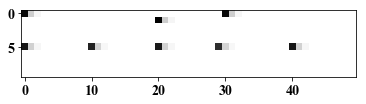

m (50, 10, 1)


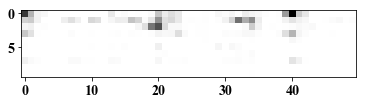

m (50, 10, 1)


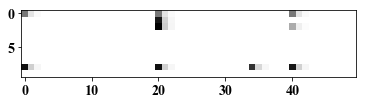

m (50, 10, 1)


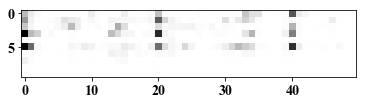

In [25]:
i,j = 0, 10
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [26]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [27]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [28]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Style transfer

In [29]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [30]:
# dn = config.plots_dir + 'transformations.pkl'
# io.save(transformations, fn)
# # transformation_extraction.save_to_disk(transformations, dn, v=1)

# fn = config.plots_dir + 'min_transformations.pkl'
# io.save(min_transformations, fn)
# # transformation_extraction.save_to_disk(min_transformations, dn)

In [31]:
fn = config.plots_dir + 'transformations-best_dims.pkl'
best_dims = io.load(fn)
fn = config.plots_dir + 'transformations.pkl'
transformations = io.load(fn)
fn = config.plots_dir + 'min_transformations.pkl'
min_transformations = io.load(fn)

(array([4., 2., 2., 1., 0., 4., 0., 0., 1., 6.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

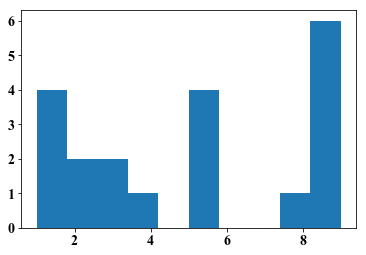

In [32]:
plt.hist(best_dims)

In [33]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [34]:
list(transformations.keys())[:3]

["01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM"]

In [35]:
len(transformations.keys())

5

In [66]:
# io.save(result, config.plots_dir + 'ncd_evaluation_results.pkl')
labelled_result = io.load(config.plots_dir + 'ncd_evaluation_results.pkl')

In [67]:
def summarize(data):
    """data :: {samples: {genre a: {genre b: grid}}}
    grid = {parameter: outcome}
    
    return :: {parameter: [value] }
    """
    summary = collections.defaultdict(list)
    for original in data.keys():
        for genre_a in data[original].keys():
            for genre_b, grid in data[original][genre_a].items():
                for k,v in grid.items():
                    summary[k].append(v)
    return summary

def evaluate(data):
    """
    data :: {parameter: [value] }
    return :: {statistic: {parameter: value}}
    """
    result = utils.summary_multi(summary, mode=list)
    std = []
    for k,v in summary.items():
        std.append(np.std(v))
    
    result['std'] = std
    print(result['mean'])
    return result, list(summary.keys())

In [68]:
result = summarize(labelled_result)
summary, x_labels = evaluate(result)
summary_ = summary.copy() # {'Mean': summary['mean'], 'Median': summary['median']}
summary_.pop('std');

[0.6233196831546133, 0.49818123053910335, 0.622482571558032, 0.0007345813082246719, 0.24872508251706998]


In [72]:
io.save_dict(config.results_dir, 'ncd_result-summary', summary)

'../results/ncd_result-summary.csv'

In [70]:
x_labels

['mean', 'median', 'min', 'max', 'std']

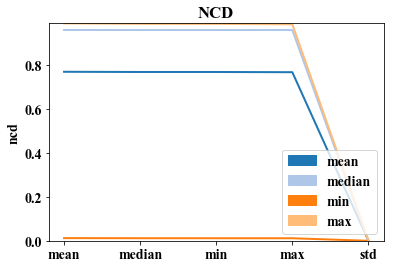

In [64]:
options = {'x_labels': x_labels, 'x_label':'Transformation intensity', 'y_label': 'ncd', 'legend':True}
plot.custom(summary_, 'NCD', options,
            type_='line', min_y_scale=None, max_y_scale=None, y_scale_margin=0.0001, show=True)

In [ ]:
plot.custom(summary_, 'NCD', options,
            type_='line', min_y_scale=None, max_y_scale=None, y_scale_margin=0.0001, show=True)

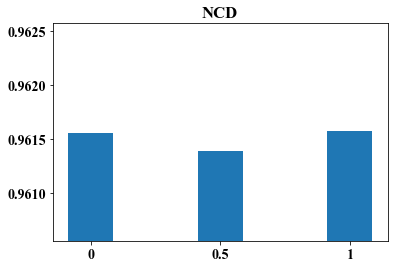

In [43]:
options = {'x_labels': x_labels}
# custom(summary, 'NCD', options, relative=True, show=True)
plot.custom({'Mean':summary['mean']}, 'NCD', options, type_='bar', min_y_scale=None, max_y_scale=None, y_scale_margin=0.001, show=True)

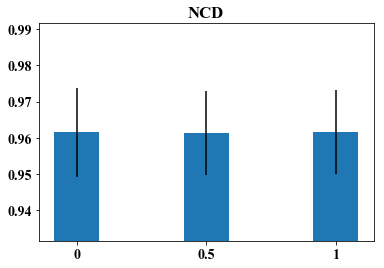

In [44]:
options = {'x_labels': x_labels,}
# custom(summary, 'NCD', options, relative=True, show=True)
std = {'Mean': summary['std'], 'Median': summary['std']}
plot.custom({'Mean':summary['mean']}, 'NCD', options, type_='bar',std=std, min_y_scale=None, max_y_scale=None, y_scale_margin=0.03, show=True)

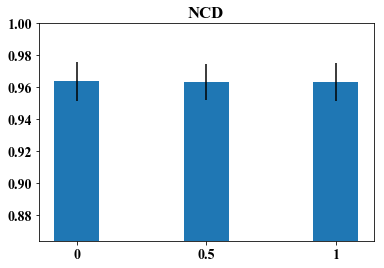

In [45]:
plot.custom({'Median':summary['median']}, 'NCD', options, type_='bar', std=std, relative=True, show=True)

In [74]:
result.keys()

dict_keys([0, 0.5, 1])

In [87]:
import scipy.stats

In [130]:
# assume all distributions are related, do not shuffle
# i.e. param1[0] is related to param2[0]
def evaluate(data, f=scipy.stats.ttest_rel, p=0.05,win_c=lambda x,y: x>y):
    result = {}
    for k,v in data.items():
        for other_k, other_v in data.items():
            if not k == other_k:
                score = scipy.stats.ttest_rel(v, other_v)                
                won = win_c(np.mean(v), np.mean(other_v))
                significant = won and score.pvalue < p
                result['%s/%s' % (k,other_k)] = (won, significant)
                print('%s vs %s: \t' % (k, other_k), won, significant, score.pvalue)

In [131]:
evaluate(result)

0 vs 0.5: 	 True False 0.6304442251500086
0 vs 1: 	 False False 0.9670311194543537
0.5 vs 0: 	 False False 0.6304442251500086
0.5 vs 1: 	 False False 0.5795253476510094
1 vs 0: 	 True False 0.9670311194543537
1 vs 0.5: 	 True False 0.5795253476510094


In [132]:
evaluate(result, scipy.stats.ttest_ind)

0 vs 0.5: 	 True False 0.6304442251500086
0 vs 1: 	 False False 0.9670311194543537
0.5 vs 0: 	 False False 0.6304442251500086
0.5 vs 1: 	 False False 0.5795253476510094
1 vs 0: 	 True False 0.9670311194543537
1 vs 0.5: 	 True False 0.5795253476510094
